## Assignment 2: Time Series Forecasting

### Tanveer Akram a1904700

#### Follow detail instructions in the assignment specification and use these heading for implementation and discussion

#Intro
In this assignment, we aim to forecast appliance consumption based on historical data. Time series forecasting involves predicting future values based on past observations, making it a valuable tool in various fields such as finance, weather forecasting, and energy consumption analysis.

#Data
As per the research paper, there are 9 different rooms. The measurements of the temperatures (in degree Celsius) and relative humiditiy (in %) was calculated.
Environmental readings were taken from a nearby airport. The data's frequency is every 10 minutes. (Candanedo, Feldheim & Deramaix 2017) (Ref 10)

The main predictor is Appliances which is what we need to forecast and build a model around.Time-Series Forecasting Models were trained and tested with different performance metrics. These models consist of uni-variate forecasting as there were no strong correlation between the appliance usage and the features in the dataset.

#Mapping
######1 -> Kitchen
######2 -> Living Room
######3 -> Laundry Room
######4 -> Office Room
######5 -> Bathroom
######6 -> Outside (North)
######7 -> Ironing Room
######8 -> Teen Room 2
######9 -> Parent Room


In [ ]:
!pip install pmdarima

#Installing this just in case it doesn't work in other systems
#This is an external installation that is required for ARIMA model

#Workshop 7

In [ ]:
#This space is for imports only
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from pmdarima.arima import auto_arima
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#Reading the data set using pandas
df = pd.read_csv("energydata_complete.csv")
df.head()

#Workshop 3

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
#Reading the columns
df.columns

#Workshop 3

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [ ]:
column_data_types = df.dtypes

# Print data types of each column
print("Data types of each column:")
print(column_data_types)

#Workshop 3

Data types of each column:
date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object


### 2. Analyse and visualise the data

In [ ]:
#Finding the number of rows and columns to identify the size of the dataset
print("Number of rows and columns:", df.shape)

#Workshop 3

Number of rows and columns: (19735, 29)


In [ ]:
#A little more data exploration to understand the data types

#Finding Categorical Data
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There is/are {} categorical variables\n'.format(len(categorical)))
print('The categorical variables are :\n\n', categorical)

#Finding Numerical Data
decimal = [var_1 for var_1 in df.columns if (df[var_1].dtype=='float64' or df[var_1].dtype =='int64')]

print('\n\nThere are {} numerical variables\n'.format(len(decimal)))
print('The Numerical variables are :\n\n', decimal)

#Workshop 3

There is/are 1 categorical variables

The categorical variables are :

 ['date']


There are 28 numerical variables

The Numerical variables are :

 ['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2']


In [ ]:
#Since the only categorical value is Date and it is always unique, we don't check for unique categorical values

In [ ]:
#Checking any null or missing values

df_missing=pd.DataFrame((round(100*(df.isnull().sum()/len(df.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

#No missing values. Yay!
#Workshop 4

,missing
date,0.0
T7,0.0
rv1,0.0
Tdewpoint,0.0
Visibility,0.0
Windspeed,0.0
RH_out,0.0
Press_mm_hg,0.0
T_out,0.0
RH_9,0.0


In [ ]:
#Categorizing the data into respective columns to find more about their data
temp = ["T1","T2","T3","T4","T5","T6","T7","T8","T9"]
hum = ["RH_1","RH_2","RH_3","RH_4","RH_5","RH_6","RH_7","RH_8","RH_9"]
weather = ["T_out", "Tdewpoint","RH_out","Press_mm_hg", "Windspeed","Visibility"]
light = ["lights"]
randoms = ["rv1", "rv2"]
target = ["Appliances"]

# Combine the lists into one list of feature variables
feature_vars = temp + hum + weather + light + randoms

# Describe the values of each variable
feature_descriptions = df[feature_vars].describe() #Ref 6

#Similar segmentation in Workshop 3

In [ ]:
print(feature_descriptions[temp])
#Mean temperatures for all the rooms are between 19-22
#Only Room 6 (which is outside) has a cooler reading with more deviation

                 T1            T2            T3            T4            T5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      21.686571     20.341219     22.267611     20.855335     19.592106   
std        1.606066      2.192974      2.006111      2.042884      1.844623   
min       16.790000     16.100000     17.200000     15.100000     15.330000   
25%       20.760000     18.790000     20.790000     19.530000     18.277500   
50%       21.600000     20.000000     22.100000     20.666667     19.390000   
75%       22.600000     21.500000     23.290000     22.100000     20.619643   
max       26.260000     29.856667     29.236000     26.200000     25.795000   

                 T6            T7            T8            T9  
count  19735.000000  19735.000000  19735.000000  19735.000000  
mean       7.910939     20.267106     22.029107     19.485828  
std        6.090347      2.109993      1.956162      2.014712  
min       -6.065000     15.39000

In [ ]:
print(feature_descriptions[hum])
#Similar to temperature, we see that Rooms have values close to 40
#Room 6 which is situated outside has a higher mean and variation
#Room 5 is interesting because this is the bathroom
#It would make sense as moisture would vary as people use it
#Room 5 also has a significantly higher max value because it is the bathroom

               RH_1          RH_2          RH_3          RH_4          RH_5  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.259739     40.420420     39.242500     39.026904     50.949283   
std        3.979299      4.069813      3.254576      4.341321      9.022034   
min       27.023333     20.463333     28.766667     27.660000     29.815000   
25%       37.333333     37.900000     36.900000     35.530000     45.400000   
50%       39.656667     40.500000     38.530000     38.400000     49.090000   
75%       43.066667     43.260000     41.760000     42.156667     53.663333   
max       63.360000     56.026667     50.163333     51.090000     96.321667   

               RH_6          RH_7          RH_8          RH_9  
count  19735.000000  19735.000000  19735.000000  19735.000000  
mean      54.609083     35.388200     42.936165     41.552401  
std       31.149806      5.114208      5.224361      4.151497  
min        1.000000     23.20000

In [ ]:
print(feature_descriptions[weather])

#Visibility and RH_out don't really seem to be of any use

              T_out     Tdewpoint        RH_out   Press_mm_hg     Windspeed  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean       7.411665      3.760707     79.750418    755.522602      4.039752   
std        5.317409      4.194648     14.901088      7.399441      2.451221   
min       -5.000000     -6.600000     24.000000    729.300000      0.000000   
25%        3.666667      0.900000     70.333333    750.933333      2.000000   
50%        6.916667      3.433333     83.666667    756.100000      3.666667   
75%       10.408333      6.566667     91.666667    760.933333      5.500000   
max       26.100000     15.500000    100.000000    772.300000     14.000000   

         Visibility  
count  19735.000000  
mean      38.330834  
std       11.794719  
min        1.000000  
25%       29.000000  
50%       40.000000  
75%       40.000000  
max       66.000000  


In [ ]:
print(feature_descriptions[light])

#75% of the values are 0?
#Let's see what the values are

             lights
count  19735.000000
mean       3.801875
std        7.935988
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max       70.000000


In [ ]:
df['lights'].value_counts()

#We see that out of 19735 values, 15252 values are 0
#This column can be removed from the model for analysis too

#Workshop 3

lights
0     15252
10     2212
20     1624
30      559
40       77
50        9
70        1
60        1
Name: count, dtype: int64

In [ ]:
print(feature_descriptions[randoms])
#Random variables were added for a different algorithm
#This can be removed as well

                rv1           rv2
count  19735.000000  19735.000000
mean      24.988033     24.988033
std       14.496634     14.496634
min        0.005322      0.005322
25%       12.497889     12.497889
50%       24.897653     24.897653
75%       37.583769     37.583769
max       49.996530     49.996530


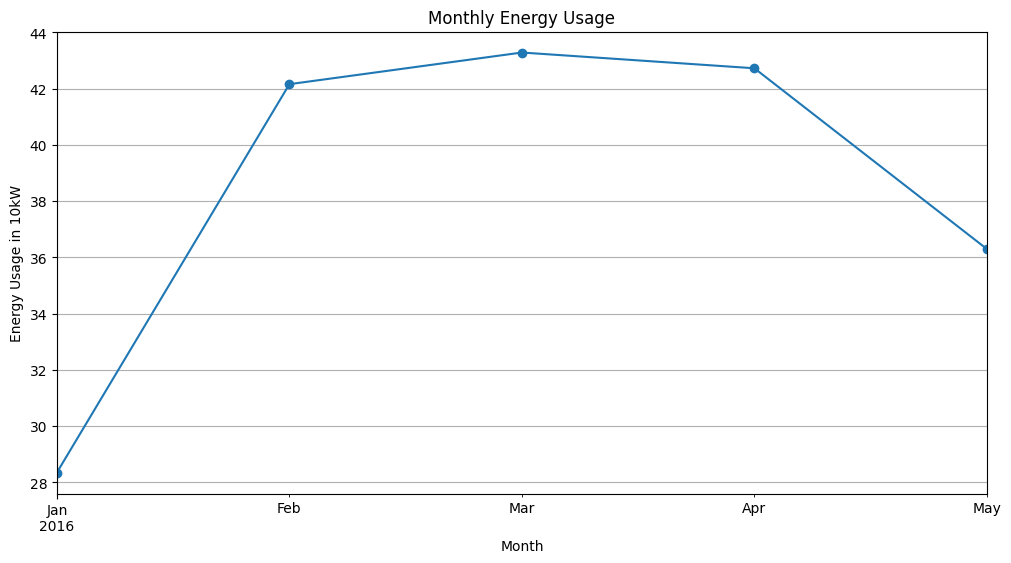

In [ ]:
# Convert 'Date' column to datetime format
df['date'] = pd.to_datetime(df['date']) #Ref 1

# Group by month and sum energy usage for each month (divide by 10k to normalize)
monthly_energy_usage = df.groupby(df['date'].dt.to_period('M'))['Appliances'].sum()/10000 #Ref 2

# Plot monthly energy usage
plt.figure(figsize=(12, 6))
monthly_energy_usage.plot(marker='o')
plt.title('Monthly Energy Usage')
plt.xlabel('Month')
plt.ylabel('Energy Usage in 10kW')
plt.grid(True)
plt.show()

#We see how the energy was distributed for the months
#Since Jan starts from 11th, we understand why the amount is lesser.
#It seems even over Feb-Apr
#May was a little down though
#Might be interesting to look as to why

#Workshop 3

In [ ]:
#Trying to find the average daily consumption for each month
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M') #Ref 1

# Getting date and month column
df['month'] = df['date'].dt.month #Ref 7
df['day'] = df['date'].dt.day #Ref 8

# Finding the average use per day for each month
average_consumption_per_month = df.groupby(['month', 'day'])['Appliances'].mean()

# Grouping them together
average_daily_consumption_per_month = average_consumption_per_month.groupby('month').mean()

print(average_daily_consumption_per_month)

#Turns out that the average monthly use was the same.
#So nothing out of the blue there

#Workshop 7

month
1     98.363095
2    100.945881
3     96.953405
4     98.888889
5     94.578590
Name: Appliances, dtype: float64


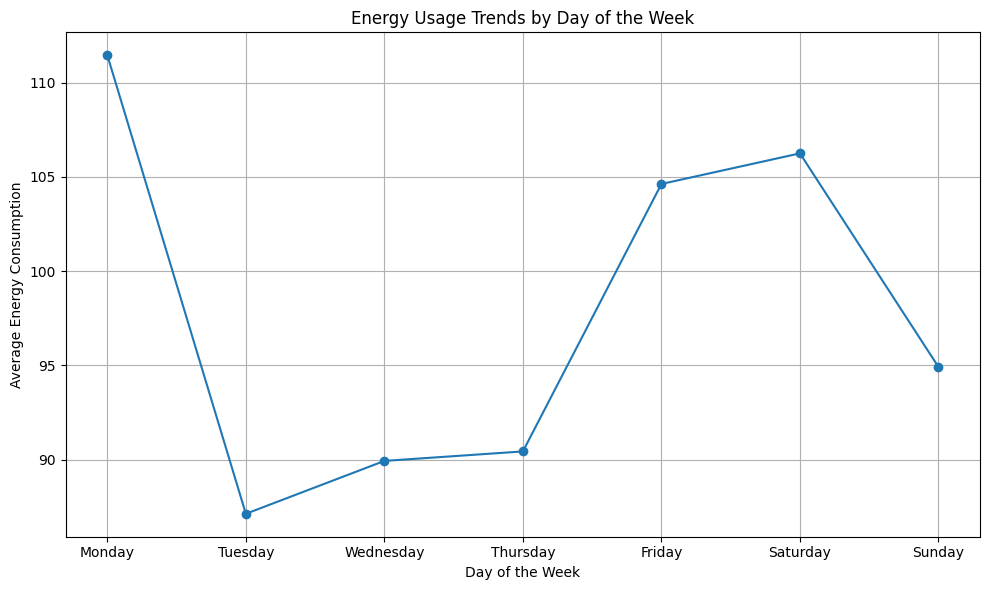

In [ ]:
# Creating a Day of the week to find energy usage for the day
df['day_of_week'] = df['date'].dt.dayofweek #Ref 3

# Group by day of the week and calculate average energy consumption
daily_energy_by_weekday = df.groupby('day_of_week')['Appliances'].mean()

# Plot energy consumption trends by day of the week
plt.figure(figsize=(10, 6))
plt.plot(daily_energy_by_weekday.index, daily_energy_by_weekday.values, marker='o')
plt.title('Energy Usage Trends by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Energy Consumption')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.grid(True)
plt.tight_layout()
plt.show()

#Monday seems to be the highest followed by Saturday and Friday
#Sunday is the next closest
#This could imply that Monday would be laundry day
#Saturday being second highest cause of the weekend, members would stay in
#Friday could imply because it's end of the week and everyone gets together and spends time together
#Sunday also part of the weekend

#Workshop 3 and Workshop 7

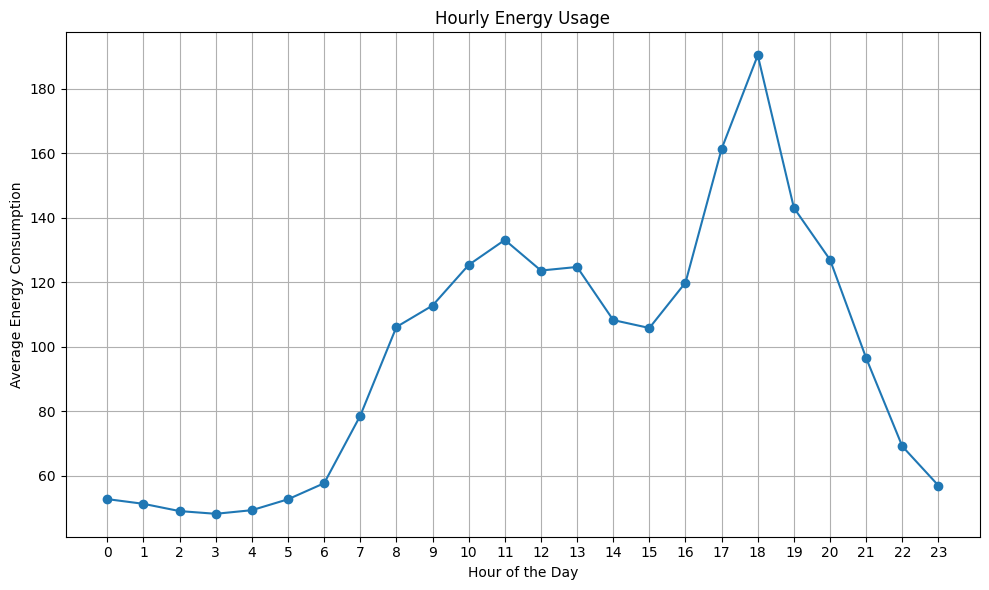

In [ ]:
# Observing the usage as per the time
df['hour'] = df['date'].dt.hour #Ref 5

# Group by hour and calculate average energy consumption
hourly_energy_usage = df.groupby('hour')['Appliances'].mean()

# Plot hourly energy usage
plt.figure(figsize=(10, 6))
plt.plot(hourly_energy_usage.index, hourly_energy_usage.values, marker='o',)
plt.title('Hourly Energy Usage')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption')
plt.grid(True)
plt.xticks(range(24))
plt.tight_layout()
plt.show()

#We see that the most usage is during 1700 to 1900
#Some usage during the morning to afternoon -> 0700 to 1200 implies that the day starts at 7.
#There is a home office that would indicate why there is some consumption during the day
#1400-1500 could indicate lunch time
#1600 could indicate that all members are back and a lot of appliances aer used until 2000

#Workshop 3 and Workshop 7

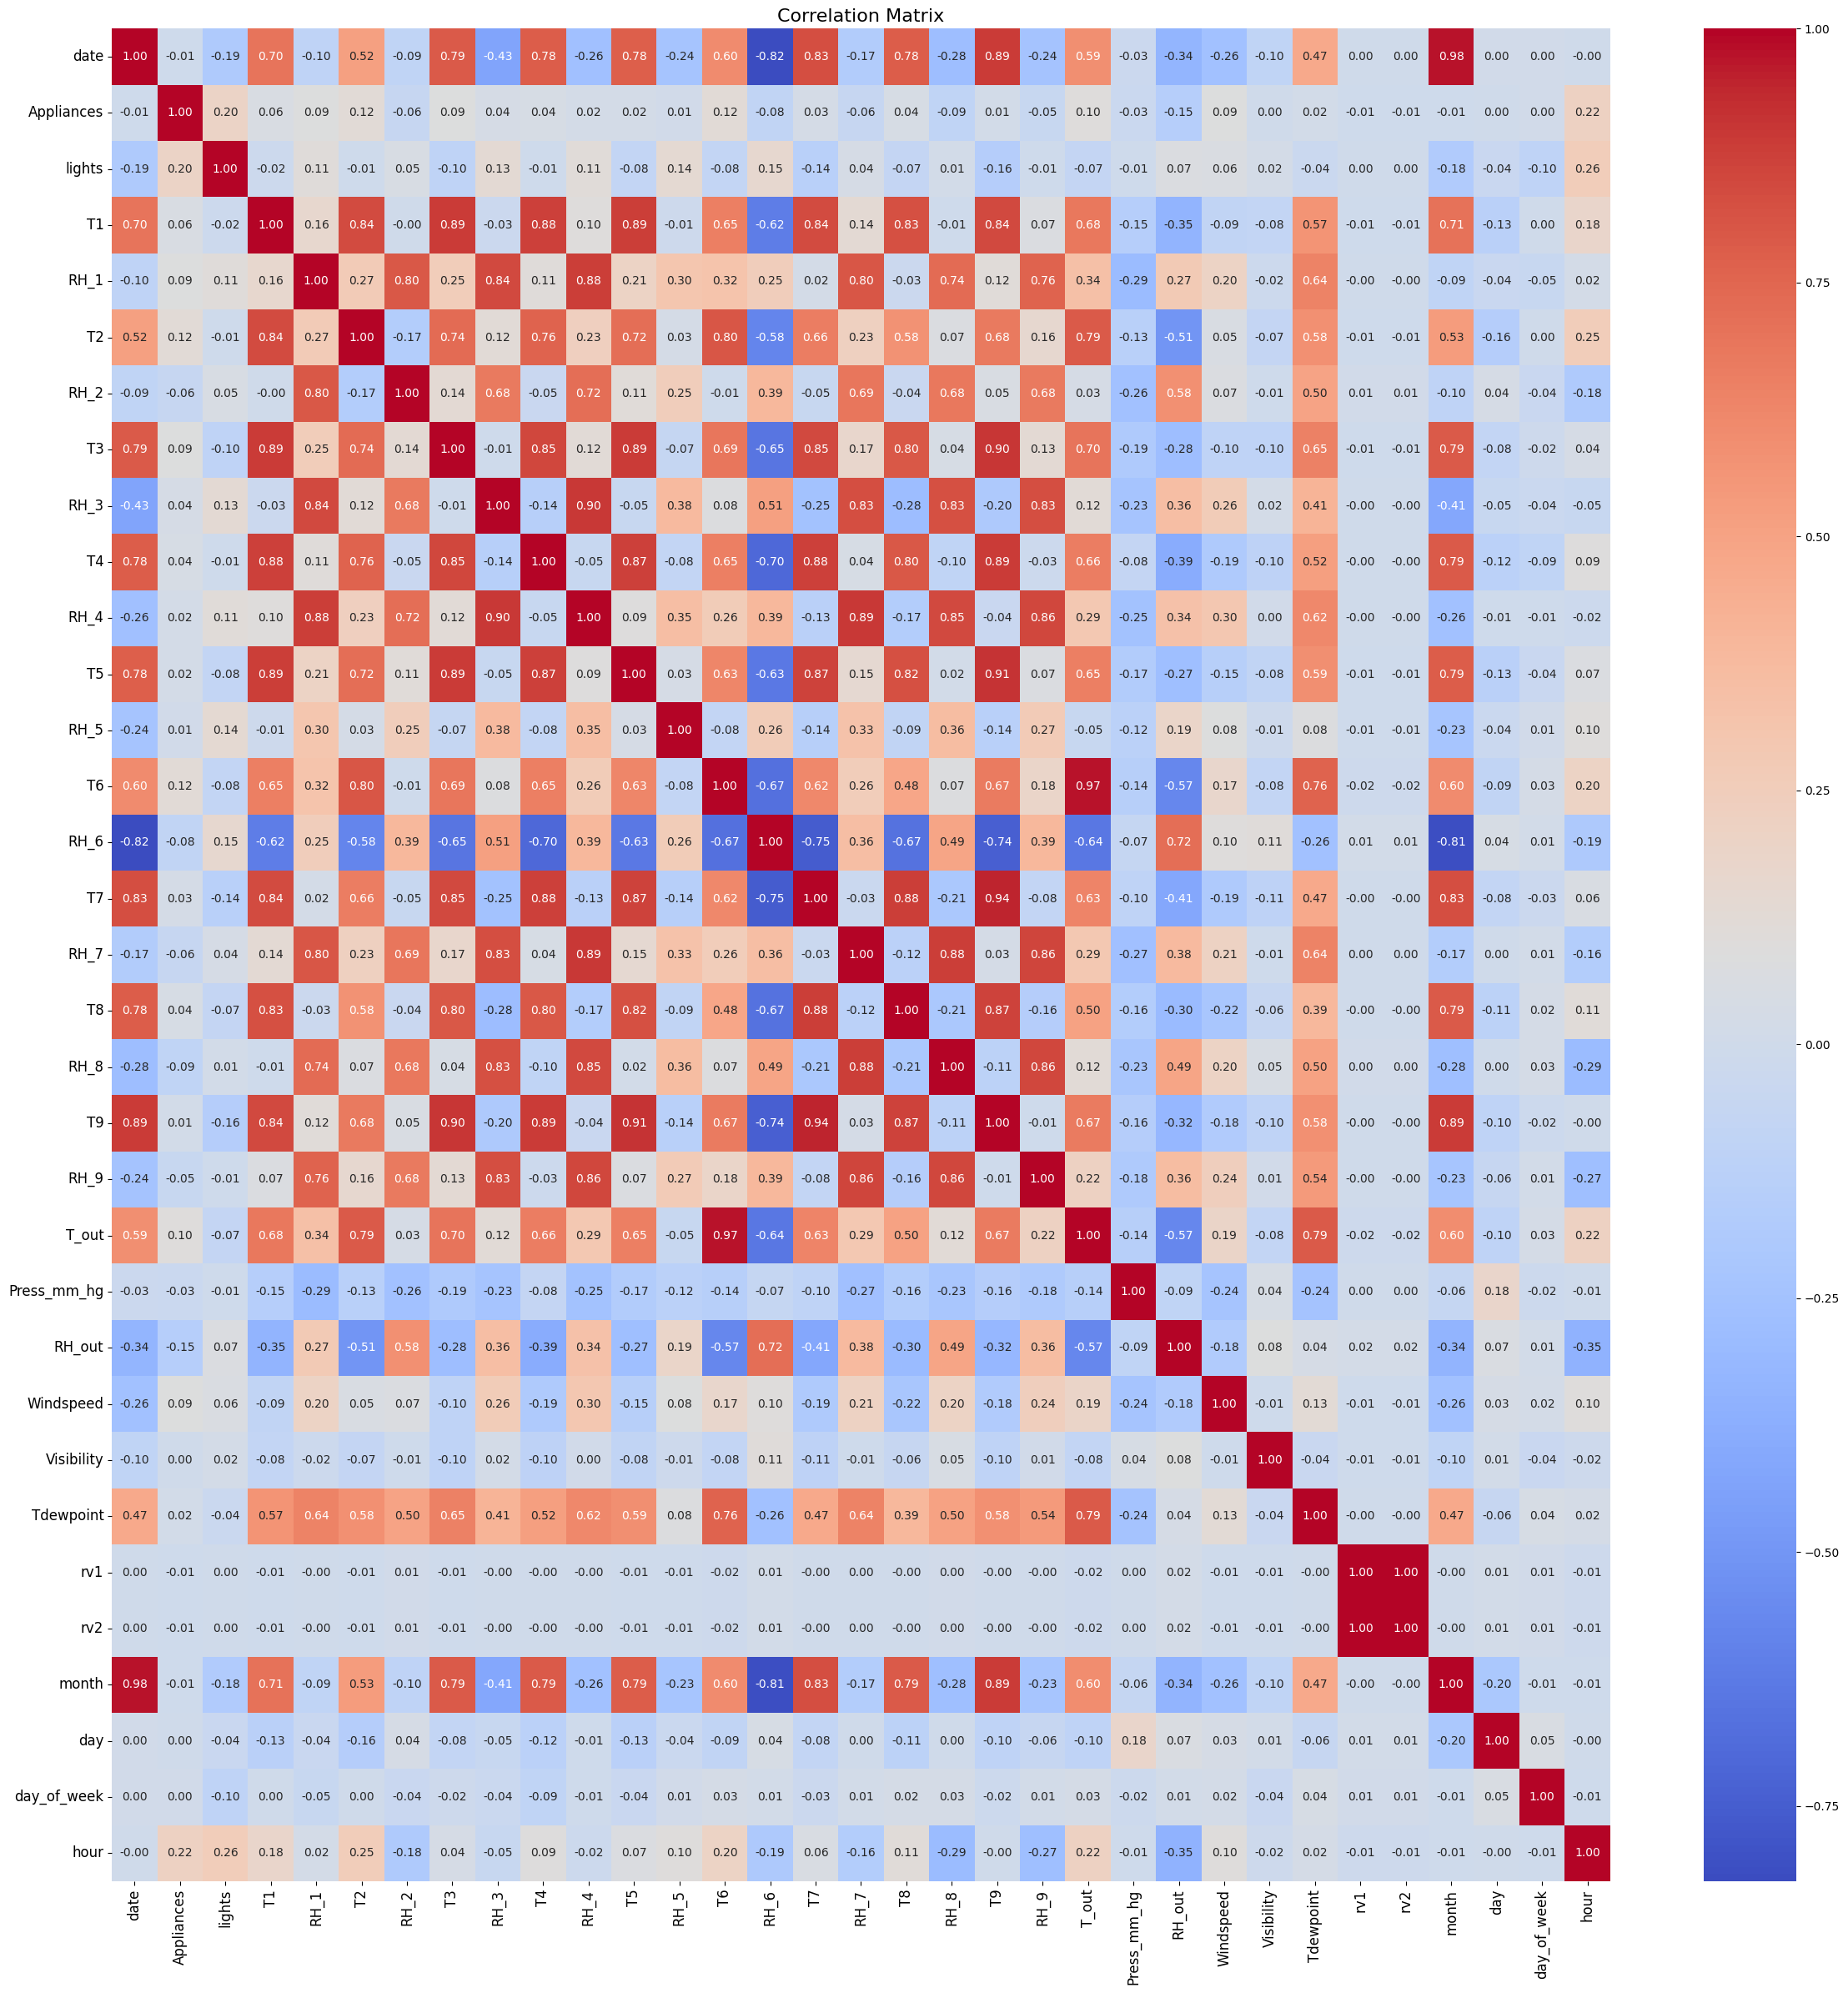

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()

# Plotting data frame in 1 plot
plt.figure(figsize=(24, 24))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#Workshop 3

#High correlation between T1 T2 T3 T4 T5 T7 T8 T9 To are all highly correlated. T6 is situated outside
#This is due to HVAC systems controlling the house temperature
#This also applies for high correlation between Relative Humidity RH1 RH9
#Temperature and Relative Humidity are oppositely correlated which is correct
#Rv1 and Rv2 are variables that were introduced and not required
#A strong relation between hours and appliances

In [ ]:
#rv1 rv2 can be dropped
#Visibility can be dropped as well
#Windspeed seems to have some correlation so that will be kept
#So does Tdewpoint
#day_of_week and hour was created so that will be dropped again
#T6 and Tout are almost fully correlated so we can drop T6 (Since T6 is Temperature outside the house)
#lights can also be dropped because of the count of 0s

#Columns to drop are: rv1 rv2 Visibility day_of_week hour T6 lights

In [ ]:
# Define the columns to drop
columns_to_drop = ['rv1', 'rv2', 'Visibility', 'day_of_week', 'hour', 'T6', 'lights', 'month','day']

# Drop the columns from the DataFrame
df_cleaned = df.drop(columns=columns_to_drop)
print(df_cleaned.head())

#Workshop 3

                 date  Appliances     T1       RH_1    T2       RH_2     T3  \
0 2016-01-11 17:00:00          60  19.89  47.596667  19.2  44.790000  19.79   
1 2016-01-11 17:10:00          60  19.89  46.693333  19.2  44.722500  19.79   
2 2016-01-11 17:20:00          50  19.89  46.300000  19.2  44.626667  19.79   
3 2016-01-11 17:30:00          50  19.89  46.066667  19.2  44.590000  19.79   
4 2016-01-11 17:40:00          60  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4  ...       RH_7    T8       RH_8  \
0  44.730000  19.000000  45.566667  ...  41.626667  18.2  48.900000   
1  44.790000  19.000000  45.992500  ...  41.560000  18.2  48.863333   
2  44.933333  18.926667  45.890000  ...  41.433333  18.2  48.730000   
3  45.000000  18.890000  45.723333  ...  41.290000  18.1  48.590000   
4  45.000000  18.890000  45.530000  ...  41.230000  18.1  48.590000   

          T9   RH_9     T_out  Press_mm_hg  RH_out  Windspeed  Tdewpoint  
0  17.033333  45.53  6.

In [ ]:
daily_mean = df.groupby(df['date'].dt.date)['Appliances'].mean().reset_index() #Ref 12

# Create traces for seasonal variations and trend
trace_seasonal = go.Scatter(x=daily_mean['date'], y=daily_mean['Appliances'], mode='lines', name='Seasonal Variation')
trace_trend = go.Scatter(x=daily_mean['date'], y=daily_mean['Appliances'].rolling(window=30, min_periods=1).mean(), mode='lines', name='Trend')

layout = go.Layout(title='Seasonal Variations and Trend in Appliance Consumption',
                   xaxis=dict(title='Date'),
                   yaxis=dict(title='Appliance Consumption'))

fig = go.Figure(data=[trace_seasonal, trace_trend], layout=layout)

fig.show()

#Seasonal Variation
#The fluctuations in appliance consumption from January to mid-March is lesser
#than the fluctuations of the following month
#Belgium experiences distinct seasons, with colder temperatures in winter and warmer temperatures in spring.
#The increase in appliance consumption from March to May could be attributed to the transition from colder weather to warmer weather,
#leading to increased use of appliances such as air conditioners, fans, or refrigeration units.

#Trend
#The consistent trend with appliance consumption staying almost constant throughout the observed period
#suggests a baseline level of usage that remains relatively stable over time.
#This could represent the household's typical energy usage for essential appliances or ongoing background activities that
#contribute to a consistent level of consumption.

#Workshop 7
#Ref 9

##Daily And Weekly

#Analysis of Visualisations (230 words)

##1. Categorical and Numerical Variables
#####There is one categorical value (date) and 28 numerical values. 'date' aids in temporal analysis and we note that the data frequency is every 10 minutes. This can help us analyse various trends in set intervals of time

##2. Temperature and Humidity Trends
#####The mean temperatures for most rooms are relatively consistent, with Room 6 (outside) showing cooler readings and more deviation. The humidity is also quite erratic. Room 5 (bathroom) shows high variability in humidity, likely due to moisture fluctuations associated with usage.

##3.Energy Consumption Patterns

#####Monthly energy distribution shows relatively consistent usage, with minor fluctuations across months. Daily consumption patterns reveal higher usage during certain times, possibly corresponding to typical household activities such as morning routines, meal times, office hours, and evening activities.

##4.Correlation Analysis

#####Strong correlations between indoor temperatures (T1 to T9) and their association with the HVAC system suggest consistent temperature regulation within the household.

#####Similarly, the correlation between relative humidity values (RH1 and RH9) indicates an expected inverse relationship with temperature.

#####Appliances doesn't seem to have any strong correlation with temperatures or humidity. This indicates that a uni-variate forecasting model would be viable

##6. Seasonal and Trend Analysis
#####The dataset displays clear daily and weekly seasonality trends. Daily, energy consumption rises steadily from morning to evening, reflecting typical household activity patterns. Weekly, consumption peaks over the weekend, indicating increased home occupancy.
#####Overall energy usage maintains a consistent trend over time, suggesting stable consumption habits regardless of external factors or seasonal changes.

### 3. Implement prediction models

In [ ]:
#ARIMA Model

# Convert the timestamp column to datetime
df['date'] = pd.to_datetime(df['date'])

# Set 'date' column as the index
df.set_index('date', inplace=True)

# Resample the data to get the mean of energy consumption for each day
daily_energy = df['Appliances'].resample('D').mean() #Ref 11

# Reset index to make 'date' a column again
daily_energy = daily_energy.reset_index() #Ref 12

# Print the resulting DataFrame
print(daily_energy)

#I'm trying to convert the frequency of readings from every 10 minutes to daily
#This would make it easier for my model and faster as well as it reduces the dataset size
#Workshop 7

          date  Appliances
0   2016-01-11  136.666667
1   2016-01-12   85.694444
2   2016-01-13   97.013889
3   2016-01-14  151.388889
4   2016-01-15  125.347222
..         ...         ...
133 2016-05-23   83.055556
134 2016-05-24   96.180556
135 2016-05-25   83.888889
136 2016-05-26  147.013889
137 2016-05-27  136.330275

[138 rows x 2 columns]


In [ ]:
#LSTM Model

# Load the dataset
df_LSTM = pd.read_csv('energydata_complete.csv', parse_dates=['date'], index_col='date') #Reloading the dataset to parse date for LSTM model

# Resample the data to get the mean of appliance consumption for each day
daily_appliance = df_LSTM['Appliances'].resample('D').mean() #Ref 11

# Reset index to make 'date' a column again
daily_appliance = daily_appliance.reset_index() #Ref 12

# Select data up to the end of 2019 and convert values to floats

daily_appliance['Appliances'] = daily_appliance['Appliances'].astype(float)

#Process Technqiues (86 Words)

##Scaling
#####For the LSTM model, scaling is a common step for neural networks to normalize the input features within a specific range, which can help improve training convergence and model performance.
#####For the ARIMA model, since it's a classical statistical model and doesn't involve gradient descent optimization, scaling is not necessary.

##Feature Selection
#####As the correlation matrix shows no strong correlation with other features, the model is built on date and appliances

##Imputation of Missing Values
#####In our analysis, there were no missing values

### 4. Train prediction models

In [ ]:
#ARIMA Training

# Split the data into training and validation sets
train_size_ARIMA = int(0.8 * len(daily_energy)) #We take 80% training
train_ARIMA = daily_energy.iloc[:train_size_ARIMA]
valid_ARIMA = daily_energy.iloc[train_size_ARIMA:]

# We're only interested in Appliances
training_ARIMA = train_ARIMA['Appliances']
validation_ARIMA = valid_ARIMA['Appliances']

# Fit the ARIMA model using the training data
model_ARIMA = auto_arima(training_ARIMA, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                   start_P=0, seasonal=True, d=1, D=1, trace=True,
                   error_action='ignore', suppress_warnings=True)
model_ARIMA.fit(training_ARIMA)

# Make predictions on the validation data using the ARIMA model
forecast = model_ARIMA.predict(n_periods=len(validation_ARIMA))
forecast = pd.DataFrame(forecast, index=valid_ARIMA.index, columns=['Prediction'])

#Workshop 7

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=2.57 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=1078.598, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=1043.220, Time=0.74 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.52 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=1068.853, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=1025.769, Time=1.15 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.68 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.97 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=1045.261, Time=0.61 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=1021.959, Time=1.95 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=1034.062, Time=0.63 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=6.80 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=1018.184, Time=2.73 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=1031.8

In [ ]:
#LSTM Model

def train_test(df, test_periods):
    """
    Split the dataset into training and testing sets
    """
    train = df[:-test_periods].values
    test = df[-test_periods:].values
    return train, test

test_periods = 16
train, test = train_test(daily_appliance['Appliances'], test_periods)

# Scale the training data
scaler = MinMaxScaler()
train = train.reshape(-1, 1)  # Reshape the array to have a single feature
scaler.fit(train)
train_scaled = scaler.transform(train)
train_scaled = torch.FloatTensor(train_scaled)

#TESTING SCALED?
test = test.reshape(-1,1)
scaler.fit(test)
test_scaled = scaler.transform(test)
test_scaled = torch.FloatTensor(test_scaled)

# Reshape the training data to the correct dimensions
train_scaled = train_scaled.view(-1)
test_scaled = test_scaled.view(-1)

# Define a function to create the input/output pairs for the LSTM model
def get_x_y_pairs(train_scaled, train_periods, prediction_periods):
    """
    train_scaled - training sequence
    train_periods - how many data points to use as inputs
    prediction_periods - how many periods to output as predictions
    """
    x_train = [train_scaled[i:i+train_periods] for i in range(len(train_scaled)-train_periods-prediction_periods)]
    y_train = [train_scaled[i+train_periods:i+train_periods+prediction_periods] for i in range(len(train_scaled)-train_periods-prediction_periods)]

    # Use the stack function to convert the list of 1D tensors
    # into a 2D tensor where each element of the list is now a row
    x_train = torch.stack(x_train)
    y_train = torch.stack(y_train)

    return x_train, y_train

train_periods = 16  # Number of days for input
prediction_periods = test_periods
x_train, y_train = get_x_y_pairs(train_scaled, train_periods, prediction_periods)

# Define the LSTM model architecture
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden=None):
        if hidden == None:
            self.hidden = (torch.zeros(1, 1, self.hidden_size),
                           torch.zeros(1, 1, self.hidden_size))
        else:
            self.hidden = hidden

        lstm_out, self.hidden = self.lstm(x.view(len(x), 1, -1), self.hidden)
        predictions = self.linear(lstm_out.view(len(x), -1))
        return predictions[-1], self.hidden

# Define the loss function and optimizer
model = LSTM(input_size=1, hidden_size=50, output_size=prediction_periods)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the LSTM model
epochs = 600
model.train()

for epoch in range(epochs + 1):
    for x, y in zip(x_train, y_train):
        y_hat, _ = model(x, None)
        optimizer.zero_grad()
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()

    if epoch % 100 == 0:
        print(f'epoch: {epoch:4} loss:{loss.item():10.8f}')

#Workshop 7
#Taken fully from workshop 7

epoch:    0 loss:0.01591248
epoch:  100 loss:0.01493114
epoch:  200 loss:0.00395773
epoch:  300 loss:0.00032753
epoch:  400 loss:0.00013559
epoch:  500 loss:0.00011097
epoch:  600 loss:0.00017200


#Model Selection Justification (77 Words)
####ARIMA is good at finding patterns and trends in data that change over time. It's straightforward to interpret and works well with both steady and changing datasets.
####LSTM is excellent at handling more complex relationships and patterns in data. It can figure out hidden patterns in the data and make predictions based on them.

####By using both models, we can cover a wide range of scenarios and make more accurate predictions about the future.

### 5. Test prediction models and show results

In [ ]:
#Test ARIMA Model

# Create subplots for the actual and predicted data
fig = make_subplots(rows=1, cols=1, shared_xaxes=True, vertical_spacing=0.03)

# Add actual and predicted data to the first subplot
fig.add_trace(go.Scatter(x=train_ARIMA.index, y=train_ARIMA['Appliances'], name='Training Data'), row=1, col=1)
fig.add_trace(go.Scatter(x=valid_ARIMA.index, y=valid_ARIMA['Appliances'], name='Validation Data'), row=1, col=1)
fig.add_trace(go.Scatter(x=valid_ARIMA.index, y=forecast['Prediction'], name='Predicted Values'), row=1, col=1)

# Set the figure layout
fig.update_layout(title='Average Daily Appliance Energy Consumption - ARIMA',
                  xaxis_title='Date', height=500, width=1600)

# Show the figure
fig.show()

#Workshop 7

In [ ]:
#Test LSTM Model
#Taken completely from Workshop 7

# Use the trained model to make predictions on the training set
model.eval()
with torch.no_grad():
    predictions, _ = model(train_scaled[-train_periods:], None)

# Apply inverse transform to undo scaling
predictions = scaler.inverse_transform(np.array(predictions.reshape(-1, 1)))

# Create a Plotly graph of the predicted vs actual appliance consumption
x = daily_appliance.index
fig = go.Figure()

fig.add_trace(go.Scatter(x=x[:-len(predictions)], y=daily_appliance['Appliances'][:-len(predictions)], mode='lines', name='True Values'))
fig.add_trace(go.Scatter(x=x[-len(predictions):], y=daily_appliance['Appliances'][-len(predictions):], mode='lines', name='Validation'))
fig.add_trace(go.Scatter(x=x[-len(predictions):], y=predictions.ravel(), mode='lines', name='Predicted Values'))

fig.update_layout(title='Daily Appliance Consumption', xaxis_title='Date', yaxis_title='Appliance Consumption', width = 1500)
fig.show()

#Workshop 7


### 6. Compare the results from all candidate models, choose the best model, justify your choice and discuss the results

Compare the results from all candidate models, choose the best model, justify your choice and discuss the results.

In [ ]:
#ARIMA model
y_true_valid = valid_ARIMA['Appliances'].values
y_pred_model = forecast['Prediction'].values

# Calculate RMSE
rmse_ARIMA = np.sqrt(mean_squared_error(y_true_valid, y_pred_model)) #As pointed in Ref 10 pg. 88-89

# Calculate MAE
mae_ARIMA = mean_absolute_error(y_true_valid, y_pred_model) #As pointed in Ref 10 pp. 88-89

# Print RMSE and MAE
print("RMSE for ARIMA:", rmse_ARIMA)
print("MAE for ARIMA:", mae_ARIMA)



RMSE for ARIMA: 35.65168725467541
MAE for ARIMA: 24.897485385286053


In [ ]:
#LSTM model

# Calculate RMSE
rmse_LSTM = np.sqrt(mean_squared_error(test, predictions)) #As pointed in Ref 10 pg. 88-89

# Calculate MAE
mae_LSTM = mean_absolute_error(test, predictions) #As pointed in Ref 10 pp. 88-89

# Print RMSE and MAE
print("RMSE for LSTM:", rmse_LSTM)
print("MAE for LSTM:", mae_LSTM)


RMSE for LSTM: 31.104571307792618
MAE for LSTM: 26.530491697192797


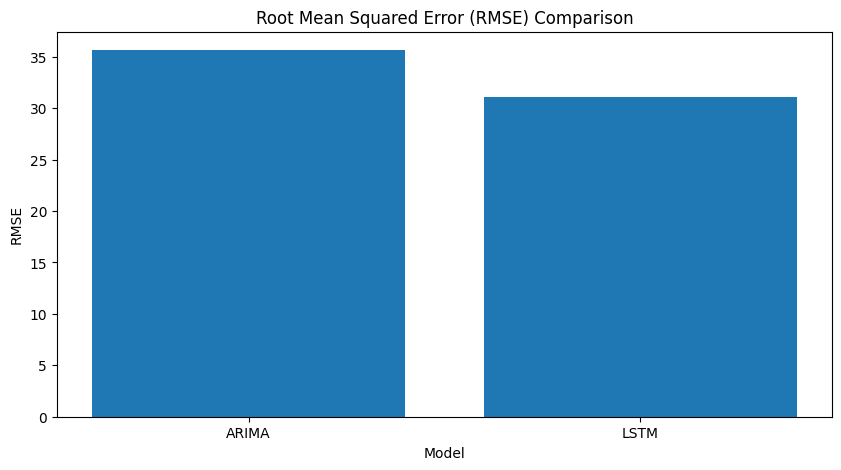

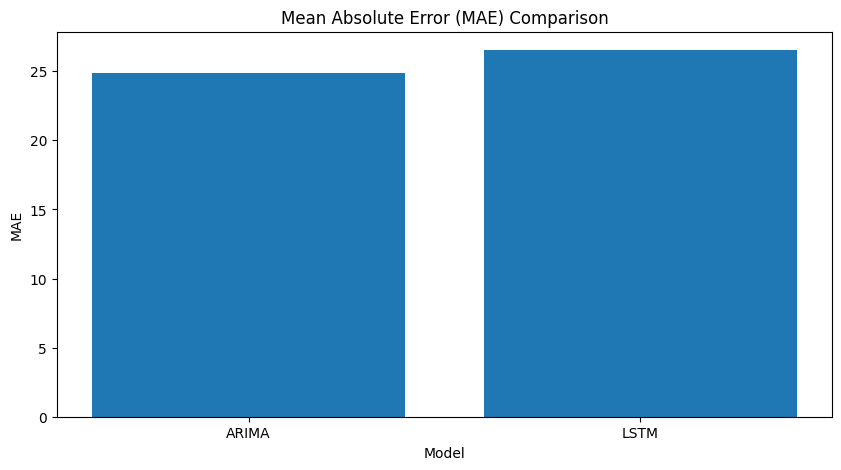

In [ ]:
#Comparing models in a chart to see which is better

# Define RMSE and MAE values for ARIMA and LSTM
rmse_values = [rmse_ARIMA, rmse_LSTM]
mae_values = [mae_ARIMA, mae_LSTM]
models = ['ARIMA', 'LSTM']

# Plot RMSE
plt.figure(figsize=(10, 5))
plt.bar(models, rmse_values)
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.xlabel('Model')
plt.ylabel('RMSE')
plt.show()

# Plot MAE
plt.figure(figsize=(10, 5))
plt.bar(models, mae_values)
plt.title('Mean Absolute Error (MAE) Comparison')
plt.xlabel('Model')
plt.ylabel('MAE')
plt.show()

#Workshop 3

#Result
####After training and evaluating the ARIMA and LSTM models for time series forecasting, performance metrics such as RMSE and MAE were used to assess their accuracy. These performance metrics were used as mentioned in Ref 10 pp. 88-89

####Visualizing the results through a comparison chart revealed that the ARIMA model outperformed the LSTM model by a small margin. While the difference in performance between the two models is minimal, the ARIMA model consistently exhibited slightly better accuracy metrics across the test dataset and graph.

####Overall, these findings suggest that the ARIMA model is the more suitable choice for time series forecasting in this scenario, as it provides slightly more accurate predictions.

### 7. Reflect on what you have learned by completing this assignment

#Reflection (191 words)
####The assignment on time-series forecasting has strengthened my understanding of time-series data analysis and forecasting techniques. Through this assignment, I gained valuable insights into the importance of time-series data visualization in identifying trends, seasonality, and patterns. Trends can be observed in different frequencies (hourly, daily, weekly, monthly yearly etc.)

####By exploring various plots and visualizations, I learned to interpret the temporal nature of data, helping me derive meaningful insights and make informed decisions.

####Reading and researching more on various Time-series forecasting models like ARIMA and LSTM, has given me a good grasp of these models. Some models can be easily available through libraries like auto_arima, whereas some models would require building from scratch (like LSTM in this example). I learned to evaluate model performance using metrics like RMSE, and MAE gaining insights into the strengths and limitations of each model in capturing the underlying patterns in time-series data.

####Overall, this assignment has given me a good understanding of the fundamentals and basics of time-series forecasting. Although it's for a uni-variate model, more time and effort needs to be spent on taking other features into consideration to build a stronger model

### 8. References

In [ ]:
# [1] https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html
# [2] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.to_period.html
# [3] https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.dayofweek.html
# [4] https://www.mathworks.com/help/matlab/ref/bar.html
# [5] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.hour.html
# [6] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html
# [7] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.month.html
# [8] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.day.html
# [9] https://plotly.com/python-api-reference/generated/plotly.graph_objects.Scatter.html
# [10] Candanedo, LM, Feldheim, V & Deramaix, D 2017, ‘Data driven prediction models of energy use of appliances in a low-energy house’, Energy and Buildings, vol. 140, pp. 81–97.
# [11] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.resample.html
# [12] https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reset_index.html